# 🔄 Reciprocal Transformation ($y = 1/x$)

The Reciprocal Transformation is a mathematical operation where each value $x$ is replaced by its inverse, $1/x$. In the **Tukey’s Ladder of Powers**, this corresponds to a power of $\lambda = -1$.

---

### 1. How it Works: The "Flip" Effect
This transformation has two dramatic effects on your data:
1.  **Order Reversal:** It reverses the relative order of values. The largest value in your original dataset becomes the smallest value in the transformed dataset.
2.  **Extreme Compression:** It drastically compresses the right tail of a distribution—even more so than a Log transformation.



---

### 2. When to Use the Reciprocal Transformation

#### A. Severe Right Skewness
If a Log transformation ($y = \log(x)$) or a Square Root transformation isn't enough to normalize your data, the Reciprocal transform is the "heavy-duty" alternative.

#### B. Meaningful Inverse Relationships
Sometimes the reciprocal of a variable is more socially or physically meaningful than the variable itself:
* **Speed vs. Time:** If you have "Speed" ($km/h$), the reciprocal is "Time per Kilometer" ($h/km$).
* **Fuel Efficiency:** In some countries, they measure "Miles per Gallon" (MPG). The reciprocal (scaled) is "Liters per 100 Kilometers" (L/100km).
* **Finance:** The P/E (Price-to-Earnings) ratio. The reciprocal is the **Earnings Yield** ($E/P$), which is often easier to use in linear models.

---

### 3. Comparison: Log vs. Reciprocal

| Feature | Log Transformation | Reciprocal Transformation |
| :--- | :--- | :--- |
| **Strength** | Moderate | **Very Strong** |
| **Order** | Preserves order (1 < 10 stays 0 < 1) | **Reverses order** (1 < 10 becomes 1 > 0.1) |
| **Formula** | $y = \log(x)$ | $y = 1/x$ |
| **Tukey Power** | $\lambda = 0$ (approximated) | $\lambda = -1$ |



---

### 4. Critical Constraints & Warnings ⚠️

* **The Zero Problem:** The transformation is **undefined for $x = 0$** (division by zero). If your data contains zeros, you must add a constant: $y = 1 / (x + c)$.
* **The Sign Problem:** It behaves very differently for positive vs. negative numbers. It is almost exclusively used for **strictly positive data**.
* **Interpretation:** Because it flips the order, a positive correlation in your original data will become a negative correlation in your transformed data. You must remember to "flip" your thinking when interpreting coefficients!

---

### 5. 🐍 Python Implementation


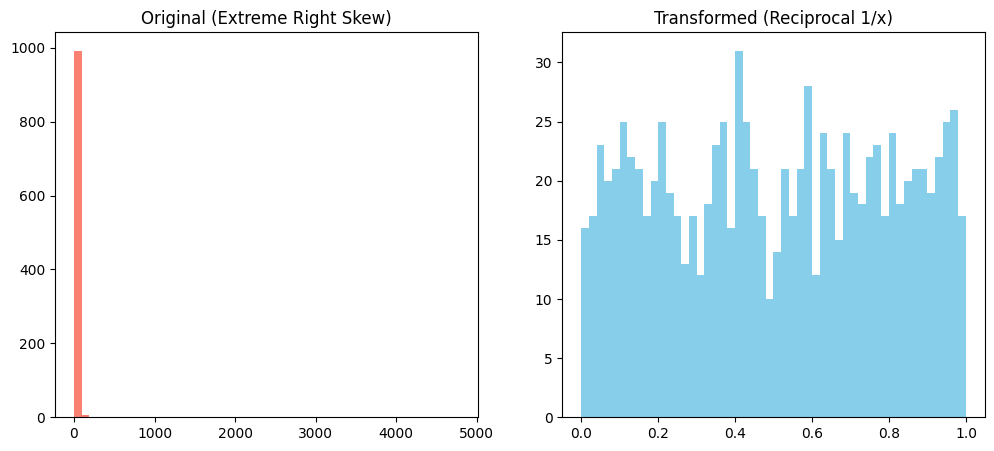

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate highly skewed data
data = np.random.pareto(a=1, size=1000) + 1 

# 1. Basic NumPy Implementation
reciprocal_data = 1 / data

# 2. Scikit-Learn FunctionTransformer (for pipelines)
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.reciprocal)
data_transformed = transformer.transform(data.reshape(-1, 1))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(data, bins=50, color='salmon')
ax1.set_title("Original (Extreme Right Skew)")

ax2.hist(reciprocal_data, bins=50, color='skyblue')
ax2.set_title("Transformed (Reciprocal 1/x)")
plt.show()